# Backtesting Data Trader's Stochastic + RSI + MACD trading strategy 
### here is the link to his video : https://www.youtube.com/watch?v=hh3BKTFE1dc

### Buying conditions: stochastic - Both K and D line should be above 20 and below 80. If K and D line both hit below 20 (Buy signal)
###                    RSI - above 50 
###                    MACD line should be above signal line, so difference between MACD and signal line should be positive
### Selling condition: K and KD line should be between 20 and 80. If K and D line hit above 80 (Sell signal)
###                    RSI should be below 50 
###                    Signal line crosses to go below the MACD line, so difference between MACD and signal line should be negative

In [322]:
!pip install ta

In [323]:
!pip install yfinance

In [324]:

import yfinance as yf
import numpy as np 
import ta
import pandas as pd

In [325]:
# we chose a 30 minute interval here, but you may play around with the arguments
df = yf.download('BTC-USD', start='2021-09-15', interval='30m') 

[*********************100%***********************]  1 of 1 completed


In [326]:
# Now I will calculate the technical indicators 
df['%K'] = ta.momentum.stoch(df.High, df.Low, df.Close, window=14, smooth_window=3)

In [327]:
df['%D'] = df['%K'].rolling(3).mean()

In [328]:
df['rsi'] = ta.momentum.rsi(df.Close, window=14)

In [329]:
df['macd']= ta.trend.macd_diff(df.Close) 

In [330]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,%K,%D,rsi,macd
Datetime,,,,,,,,,,
2021-09-14 23:00:00+00:00,47215.609375,47215.609375,46976.609375,46976.609375,46976.609375,14983168,NaN,NaN,NaN,NaN
2021-09-14 23:30:00+00:00,46991.179688,47091.554688,46940.933594,47050.539062,47050.539062,53460992,NaN,NaN,NaN,NaN
2021-09-15 00:00:00+00:00,47098.000000,47267.941406,46981.269531,47267.941406,47267.941406,264040448,NaN,NaN,NaN,NaN
2021-09-15 00:30:00+00:00,47199.433594,47289.402344,47139.585938,47169.777344,47169.777344,171102208,NaN,NaN,NaN,NaN
2021-09-15 01:00:00+00:00,47161.191406,47394.015625,47158.867188,47321.437500,47321.437500,73699328,NaN,NaN,NaN,NaN


In [331]:
#drop NaN
df.dropna(inplace=True)

In [332]:
df2 = pd.DataFrame()
for i in range(1,4): # this is 3 lags
    mask = (df['%K'].shift(i) < 25) & (df['%D'].shift(i) < 25)
    df2 = df2.append(mask, ignore_index=True)

In [333]:
# this is the buy signal, it chekcs if there is a cross within the last 3 days, so if the vertical sum is above 0 we have a buying signal.
df2.head()
df2.sum(axis=0)

2021-09-15 15:30:00+00:00    0.0
2021-09-15 16:00:00+00:00    0.0
2021-09-15 16:30:00+00:00    0.0
2021-09-15 17:00:00+00:00    0.0
2021-09-15 17:30:00+00:00    0.0
                            ... 
2021-11-13 14:30:00+00:00    0.0
2021-11-13 15:00:00+00:00    0.0
2021-11-13 15:30:00+00:00    0.0
2021-11-13 16:00:00+00:00    0.0
2021-11-13 16:30:00+00:00    0.0
Freq: 30T, Length: 2835, dtype: float64

## Then we can put everything into a function.

In [334]:

def gettriggers(df, lags, buy=True):
    df2 = pd.DataFrame()
    for i in range(1, lags+1):
        if buy:
            mask= (df['%K'].shift(i) < 25) & (df['%D'].shift(i) < 25)
        else: 
            mask= (df['%K'].shift(i) > 75) & (df['%D'].shift(i) > 75)
        df2 = df2.append(mask,ignore_index=True)
    return df2.sum(axis=0)


In [335]:
df2.head()

,2021-09-15 15:30:00+00:00,2021-09-15 16:00:00+00:00,2021-09-15 16:30:00+00:00,2021-09-15 17:00:00+00:00,2021-09-15 17:30:00+00:00,2021-09-15 18:00:00+00:00,2021-09-15 18:30:00+00:00,2021-09-15 19:00:00+00:00,2021-09-15 19:30:00+00:00,2021-09-15 20:00:00+00:00,...,2021-11-13 12:00:00+00:00,2021-11-13 12:30:00+00:00,2021-11-13 13:00:00+00:00,2021-11-13 13:30:00+00:00,2021-11-13 14:00:00+00:00,2021-11-13 14:30:00+00:00,2021-11-13 15:00:00+00:00,2021-11-13 15:30:00+00:00,2021-11-13 16:00:00+00:00,2021-11-13 16:30:00+00:00
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
df['Buytrigger'] = np.where(gettriggers(df, 4),1,0) # if we get a buy signal (sum is larger than 0) we get a 1, if we dont we get a 0.

In [337]:
df['Selltrigger'] = np.where(gettriggers(df,4, False),1,0)

In [338]:
df['Buy'] = np.where((df.Buytrigger) & (df["%K"].between(25,75)) & (df["%D"].between(25,75)) & (df.rsi>50) & (df.macd > 0),1,0)

In [339]:
df['Sell'] = np.where((df.Selltrigger) & (df['%K'].between(25,75)) & (df['%D'].between(25,75)) & (df.rsi >50) & (df.macd > 0),1,0)

In [340]:
Buying_dates, Selling_dates = [], []

In [341]:
for i in range(len(df) - 1): 
    if df.Buy.iloc[i]: # checking if each row has a buy signal
        Buying_dates.append(df.iloc[i +1].name) # if condition is met, you buy at the next timepoint (next row)
        for num,j in enumerate(df.Sell[i:]): # checking from the buying date if the selling conditions are fulfilled.
            if j: # j is the signal if its 1 or 0 
                Selling_dates.append(df.iloc[i + num + 1].name) # i + num because num is the number of iterations.
                break

In [342]:
cutoff =len(Buying_dates) - len(Selling_dates)

In [343]:
if cutoff:
    Buying_dates = Buying_dates[:-cutoff] # removing the buying dates if the selling conditions have not been fulfilled.

In [344]:
frame = pd.DataFrame({'Buying_dates':Buying_dates, 'Selling_dates': Selling_dates})

In [345]:
frame # as you can see, there are overlapping buying dates, we will eliminate this buy check if the buying date is greater than the selling date of the previous row. 

,Buying_dates,Selling_dates
0,2021-09-22 14:00:00+00:00,2021-09-22 20:00:00+00:00
1,2021-10-08 01:00:00+00:00,2021-10-08 10:30:00+00:00
2,2021-10-08 01:30:00+00:00,2021-10-08 10:30:00+00:00
3,2021-10-08 02:00:00+00:00,2021-10-08 10:30:00+00:00
4,2021-10-08 06:00:00+00:00,2021-10-08 10:30:00+00:00
5,2021-10-08 06:30:00+00:00,2021-10-08 10:30:00+00:00
6,2021-10-08 07:00:00+00:00,2021-10-08 10:30:00+00:00
7,2021-10-11 01:30:00+00:00,2021-10-14 00:00:00+00:00
8,2021-10-11 02:00:00+00:00,2021-10-14 00:00:00+00:00
9,2021-10-11 02:30:00+00:00,2021-10-14 00:00:00+00:00


In [346]:
actuals = frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

In [347]:
actuals

,Buying_dates,Selling_dates
1,2021-10-08 01:00:00+00:00,2021-10-08 10:30:00+00:00
7,2021-10-11 01:30:00+00:00,2021-10-14 00:00:00+00:00
10,2021-10-14 20:30:00+00:00,2021-10-15 15:30:00+00:00
11,2021-10-23 23:30:00+00:00,2021-10-24 23:30:00+00:00
13,2021-10-28 03:00:00+00:00,2021-10-29 03:00:00+00:00
14,2021-11-04 14:00:00+00:00,2021-11-05 09:00:00+00:00


In [348]:
def profitcalc():
    Buyprices = df.loc[actuals.Buying_dates].Open
    Sellprices = df.loc[actuals.Selling_dates].Open
    return (Sellprices.values - Buyprices.values)/Buyprices.values

In [349]:
profits = profitcalc()

In [350]:
profits

array([ 0.02247864,  0.03283024,  0.03848823, -0.00689119,  0.04433114,
        0.00135175])

In [351]:
profits.mean() 

0.02209813377041166

In [352]:
(profits +1).prod()

1.1389547984448953

### Visualization with matplotlib

In [353]:
import matplotlib.pyplot as plt 


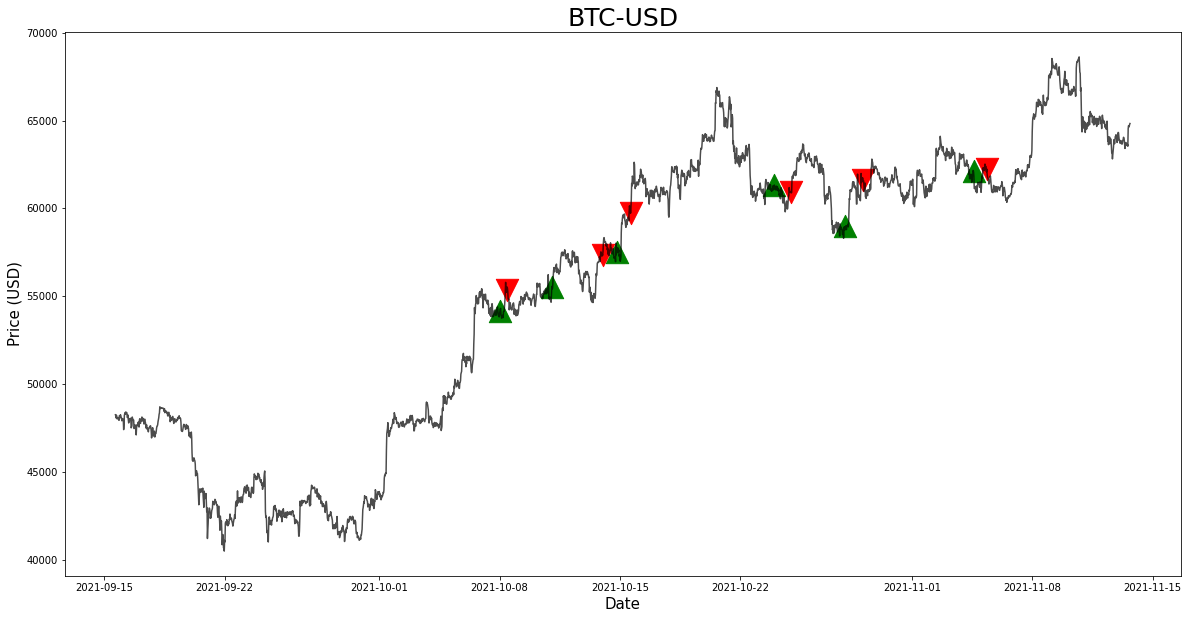

In [354]:
plt.figure(figsize=(20,10))
plt.plot(df.Close, color='k',alpha=0.7)
plt.scatter(actuals.Buying_dates, df.Open[actuals.Buying_dates], marker='^', color='g', s=500)
plt.scatter(actuals.Selling_dates, df.Open[actuals.Selling_dates], marker='v', color='r', s=500)
plt.title(label= 'BTC-USD',fontsize=25)
plt.ylabel(ylabel= 'Price (USD)', fontsize=15)
plt.xlabel(xlabel='Date', fontsize=15)
plt.show()